In [1]:
import numpy as np
import matplotlib.pyplot as plt

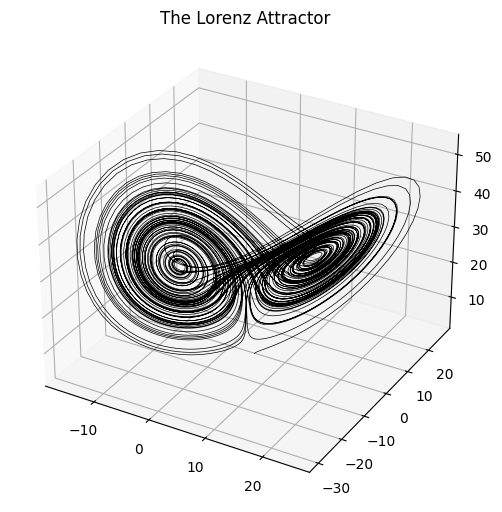

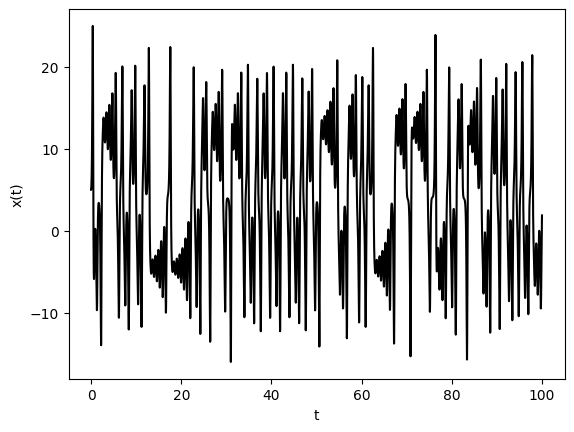

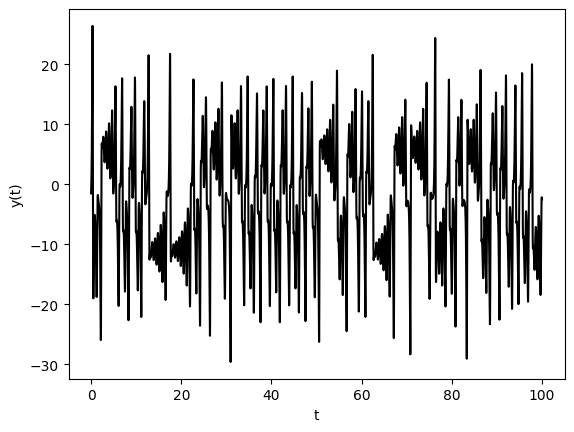

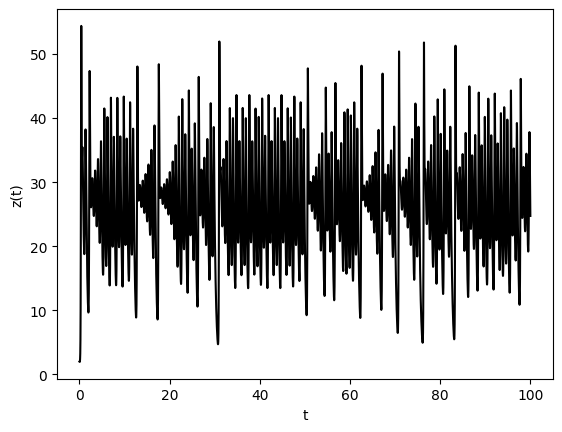

In [10]:
# solving the lorenz system:

def dx(x, y, sigma):
    return sigma*(y - x)

def dy(x, y, z, r):
    return r*x - y - x*z

def dz(x, y, z, b):
    return x*y - b*z


def RK4_Lorenz(x, y, z, dx, dy, dz, sigma, r, b, h):
    for i in range(0, len(x) - 1):
        k1x = h*dx(x[i], y[i], sigma)
        k2x = h*dx(x[i] + 0.5*k1x, y[i], sigma)
        k3x = h*dx(x[i] + 0.5*k2x, y[i], sigma)
        k4x = h*dx(x[i] + k3x, y[i], sigma)
        x[i+1] = x[i] + (k1x + 2*k2x + 2*k3x + k4x)/6

        k1y = h*dy(x[i], y[i], z[i], r)
        k2y = h*dy(x[i], y[i] + 0.5*k1y, z[i], r)
        k3y = h*dy(x[i], y[i] + 0.5*k2y, z[i], r)
        k4y = h*dy(x[i], y[i] + k3y, z[i], r)
        y[i+1] = y[i] + (k1y + 2*k2y + 2*k3y + k4y)/6

        k1z = h*dz(x[i], y[i], z[i], b)
        k2z = h*dz(x[i], y[i], z[i] + 0.5*k1z, b)
        k3z = h*dz(x[i], y[i], z[i] + 0.5*k2z, b)
        k4z = h*dz(x[i], y[i], z[i] + k3z, b)
        z[i+1] = z[i] + (k1z + 2*k2z + 2*k3z + k4z)/6

    return x, y, z

h = 0.01
t = np.arange(0, 100, h)
x = np.zeros(len(t))
y = np.zeros(len(t))
z = np.zeros(len(t))
x[0] = 1
y[0] = 1
z[0] = 1
sigma = 10
b = 8/3
r = 28
xs, ys, zs = RK4_Lorenz(x, y, z, dx, dy, dz, sigma, r, b, h) 
xs = xs + 0.5*np.random.randint(-10, 10)
ys = ys + 0.5*np.random.randint(-10, 10)
zs = zs + 0.5*np.random.randint(-10, 10)
fig = plt.figure(figsize=(5,9)) 
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs , ys, zs, lw=0.5, color = 'k')
ax.set_title('The Lorenz Attractor')
plt.tight_layout()
plt.show()

plt.plot(t,xs, color = 'k')
plt.ylabel("x(t)")
plt.xlabel("t")
plt.show()

plt.plot(t,ys, color = 'k')
plt.ylabel("y(t)")
plt.xlabel("t")
plt.show()

plt.plot(t,zs, color = 'k')
plt.ylabel("z(t)")
plt.xlabel("t")
plt.show()

In [3]:
# finding the Liapunov exponnet of the original attractor
   
h = 0.01
t = np.arange(0, 100, h)
x1 = np.zeros(len(t))
x2 = np.zeros(len(t))
y1 = np.zeros(len(t))
y2 = np.zeros(len(t))
z1 = np.zeros(len(t))
z2 = np.zeros(len(t))
sigma = 10
b = 8/3
r = 28
delta0 = [0.5, 0.2, 0.3]
x1[0] = 1
x2[0] = 1 + delta0[0]
y1[0] = 1
y2[0] = 1 + delta0[1]
z1[0] = 1
z2[0] = 1 + delta0[2]

x1s, y1s, z1s = RK4_Lorenz(x1, y1, z1, dx, dy, dz, sigma, r, b, h) 
x2s, y2s, z2s = RK4_Lorenz(x2, y2, z2, dx, dy, dz, sigma, r, b, h) 


delta = np.array([x2[-1] - x1[- 1], y2[- 1] - y1[- 1], z2[- 1] - z1[- 1]])

lyapunov = (1/t[- 1]) * np.log(np.linalg.norm(delta) / np.linalg.norm(delta0))
print(lyapunov)

[-3.17442639 -7.67459717 -2.26234539]
0.0263672722479692


[15, 54, 68, 86]
[27, 66, 69]


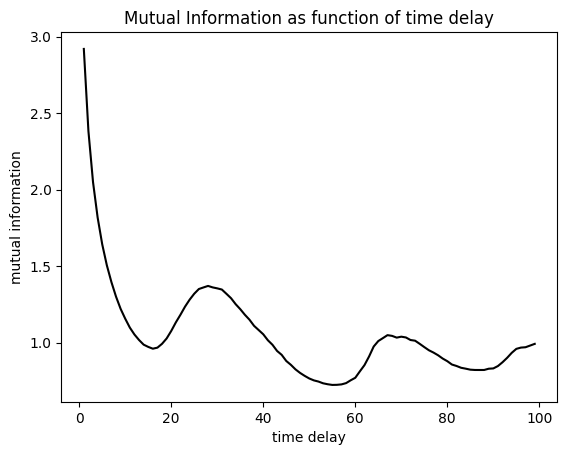

In [4]:
# finding the mutual information:

def entropy(p):
    p_norm = p / np.sum(p)
    p_norm = p_norm[np.nonzero(p_norm)]
    S = -np.sum(p_norm* np.log(p_norm))  
    return S

def MI(X,Y,bins):
    p_XY = np.histogram2d(X,Y,bins)[0]
    p_X = np.histogram(X,bins)[0]
    p_Y = np.histogram(Y,bins)[0]
 
    S_X = entropy(p_X)
    S_Y = entropy(p_Y)
    S_XY = entropy(p_XY)
 
    MI = S_X + S_Y - S_XY
    return MI


MI_vals = []
for i in range(1,100):
    v1 = xs[0:len(xs) - i]
    v2 = xs[i : len(xs)]
    MI_vals.append(MI(v1, v2, 100))
mins = []
max = []
for i in range(1, len(MI_vals)-1):
    if MI_vals[i] < MI_vals[i-1] and MI_vals[i] < MI_vals[i+1]:
        mins.append(i)

for i in range(1, len(MI_vals)-1):
    if MI_vals[i] > MI_vals[i-1] and MI_vals[i] > MI_vals[i+1]:
        max.append(i)

print(mins)
print(max)
plt.plot(np.arange(1,len(MI_vals)+1), MI_vals, color = 'k')
plt.xlabel('time delay')
plt.ylabel('mutual information')
plt.title("Mutual Information as function of time delay")
plt.show()


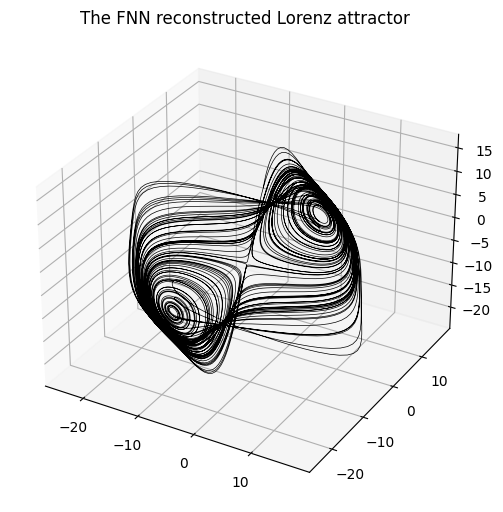

In [5]:
# try for 15 (the first minimum) assuming 3 dimensions:
v1 = xs[0: len(xs) - 30]
v2 = xs[15: len(xs) - 15]
v3 = xs[30: len(xs)]
fig = plt.figure(figsize=(5,9)) 
ax = fig.add_subplot(111, projection='3d')
ax.plot(v1, v2, v3, lw=0.5, color = 'k')
plt.tight_layout()
plt.title("The FNN reconstructed Lorenz attractor")
plt.show()


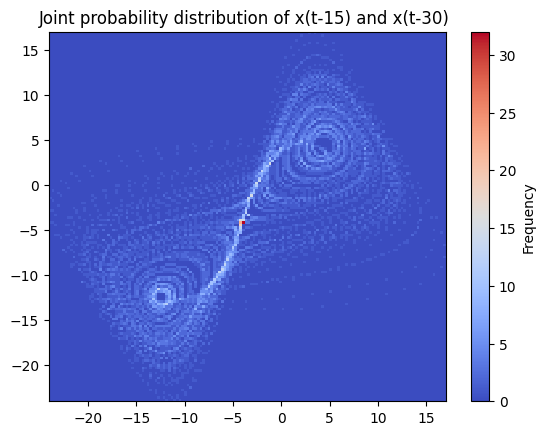

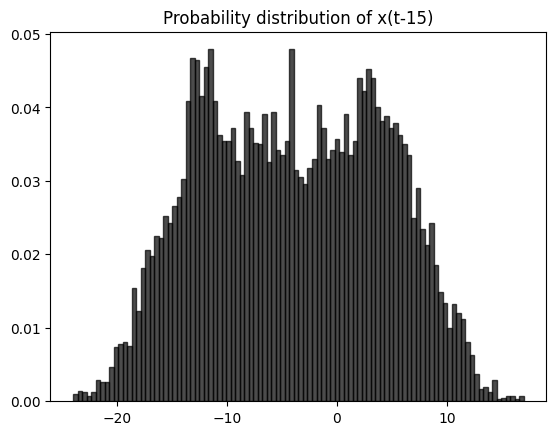

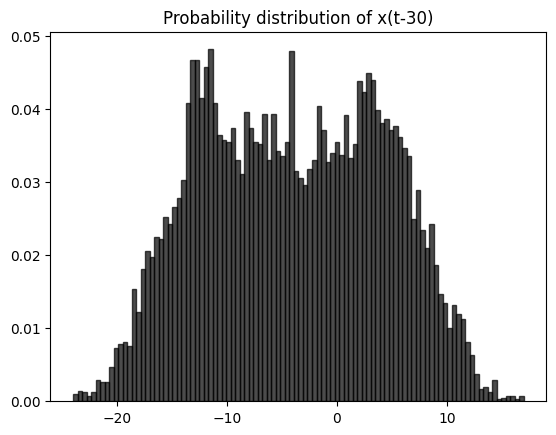

In [6]:

hist, _, _, _ = plt.hist2d(v2, v3, bins=150, cmap='coolwarm')
plt.colorbar(label='Frequency')
plt.title('Joint probability distribution of x(t-15) and x(t-30) ')
plt.show()

hist2, _, _=plt.hist(v2, bins=100, density=True, alpha=0.7, color='k', edgecolor='black')
plt.title('Probability distribution of x(t-15)')
plt.show()

hist3, _, _=plt.hist(v3, bins=100, density=True, alpha=0.7, color='k', edgecolor='black')
plt.title('Probability distribution of x(t-30)')
plt.show()

In [7]:
# finding the Liapunov exponnet of the reconstructed attractor

v11 = v1[0: len(v1)-18]
v21 = v2[0: len(v1)-18]
v31 = v3[0: len(v1)-18]

v12 = v1[18: len(v1)]
v22 = v2[18: len(v1)]
v32 = v3[18: len(v1)]

v0 = np.zeros(3)
v0[0] = v12[0] - v11[0]
v0[1] = v22[0] - v21[0]
v0[2] = v32[0] - v31[0]

vt = np.zeros(3)
vt[0] = v12[18] - v11[18]
vt[1] = v22[18] - v21[18]
vt[2] = v32[18] - v31[18]


lyapunov = (1/17) * np.log(np.linalg.norm(vt) / np.linalg.norm(v0))
print(lyapunov)

0.02588775400676898


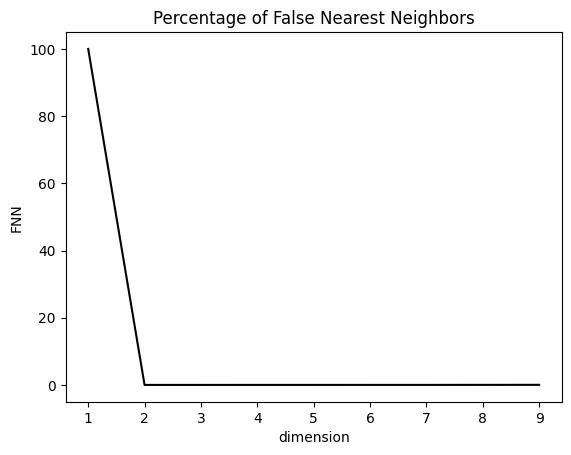

In [12]:
# FNN attempt

eps = 0.5
tau = 15
n = len(xs)
arr = []
for o in range(1, 10):
    di = 1
    d = 1
    for i in range(len(xs) - (o * tau) - 1):
        for j in range(len(xs) - (o * tau) - 1):
            if j != i:
                if (eps - np.abs(xs[i] - xs[j])) > 0:
                  R1 = 0
                  for k in range(1, o):
                     R1 = R1 + (xs[i + (k - 1) * tau] - xs[j + (k - 1) * tau])**2
                  R2 = R1 + (xs[i + o * tau] - xs[j + o * tau])**2
                  if R1 != 0 and np.sqrt((R2 - R1)/ R1) > 5:
                     di = di +1
                  d = d + 1
    arr.append(d/di)
arr = np.array(arr)
plt.plot(np.arange(1,10), (arr/arr[0])*100, color = "k")
plt.title("Percentage of False Nearest Neighbors")
plt.ylabel("FNN")
plt.xlabel("dimension")
plt.show()

(array([0, 1, 2], dtype=int64),)


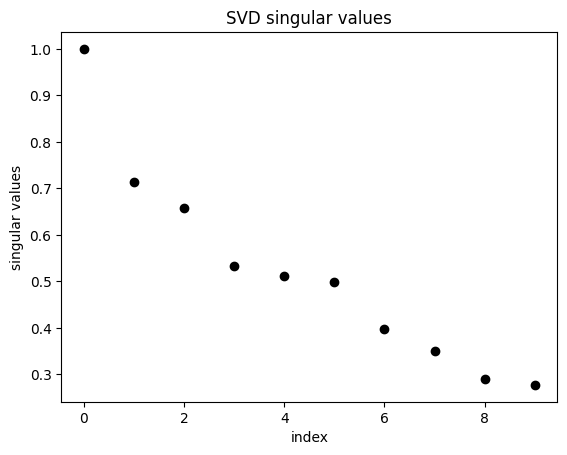

In [6]:
# SVD attempt
tau = 27
H = np.zeros((10,len(xs)-9*tau-1))
for i in range(0, 10):
    H[i,:] = xs[tau*i: len(xs)-9*tau-1 + i*tau]
U, S, V= np.linalg.svd(H)
H = H.T

plt.scatter(np.arange(len(S)), S/S[0], color = 'k')
dominant_indices = np.where(S > 1000)
print(dominant_indices)
plt.ylabel("singular values")
plt.xlabel("index")
plt.title("SVD singular values")
plt.show()


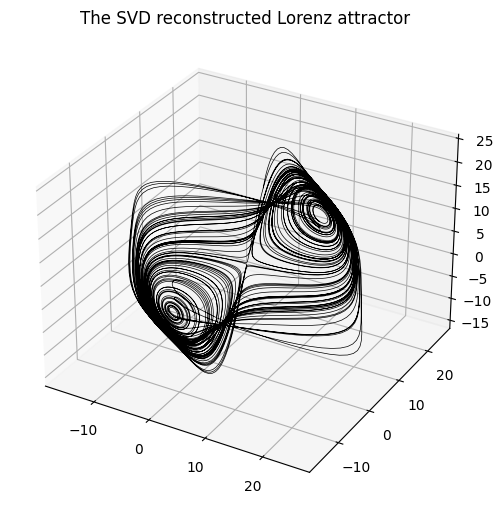

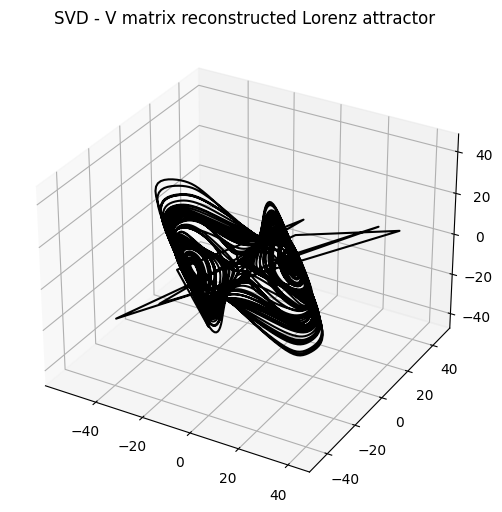

In [11]:
tau = 15
H = np.zeros((10,len(xs)-9*tau-1))
for i in range(0, 10):
    H[i,:] = xs[tau*i: len(xs)-9*tau-1 + i*tau]
U, S, V= np.linalg.svd(H)
H = H.T


fig1 = plt.figure(figsize=(5,9)) 
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot(H[:, 0], H[:, 1], H[:, 2], lw=0.5, color = 'k')
plt.tight_layout()
plt.title("The SVD reconstructed Lorenz attractor")
plt.show()

fig2 = plt.figure(figsize=(5,9))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.plot(V[:, 0]*S[0], V[:, 1]*S[1], V[:,2]*S[2], color = 'k')
plt.tight_layout()
plt.title("SVD - V matrix reconstructed Lorenz attractor")
plt.show()

In [14]:
# Lyapunov exponent for SVD reconstructed attractor

w1 = H[:, 0]
w2 = H[:, 1]
w3 = H[:, 2]

w11 = w1[0:len(w1) - 18]
w21 = w2[0:len(w1) - 18]
w31 = w3[0:len(w1) - 18]

w12 = w1[18:len(w1)]
w22 = w2[18:len(w1)]
w32 = w3[18:len(w1)]

w0 = np.zeros(3)
w0[0] = w12[0] - w11[0]
w0[1] = w22[0] - w21[0]
w0[2] = w32[0] - w31[0]

wt = np.zeros(3)
wt[0] = w12[18] - w11[18]
wt[1] = w22[18] - w21[18]
wt[2] = w32[18] - w31[18]

lyapunov = (1/17) * np.log(np.linalg.norm(wt) / np.linalg.norm(w0))
print(lyapunov)


0.02588775400676898
